In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import erf, gamma
import scipy.optimize as scp
from scipy.integrate import quad

## Sampling from a Gaussian

Let's suppose that we have a distribution $$P(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{x^2}{2\sigma}}$$

that we want to sample from. What we need to do is choose a random number $r$ in $[0,1)$, and then solve $P(x) = r$.

In [ ]:
def get_p():
    r = np.random.random()
    mu=0
    sigma=1
    
    def P(x):
        y = (x - mu)/(np.sqrt(2)*sigma)    
        return 1/2 * ( 1 + erf(y) )
    def dP(x):
        y = (x - mu)/(np.sqrt(2)*sigma)    
        return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-y**2)
    eps=1
    x=mu
    while(abs(eps)>0.000001):
        old_x = x
        x = x - (P(x)-r)/dP(x)
        
        eps = old_x-x
    
    return x

In [ ]:
num = []
for i in range(0,100000):
    num.append(get_p())

num = np.array(num)

hist,bins = np.histogram(num)

plt.hist(num,bins=np.linspace(-4,4,100))
plt.show()

## Sampling from a Gamma Distribution

A gamma distribution has a CDF:

$$P(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} e^{-\beta x} $$

and a PDF:

$$\rho(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} e^{-\beta x} $$


# Integrating functions

In [37]:
mu=1
sigma=1
def rho(x):
    y = (x - mu)/(np.sqrt(2)*sigma)    
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-y**2)
    #return np.exp(-x**2)


def P(x):
    return quad(rho,-100,x)

array([0.15865525])

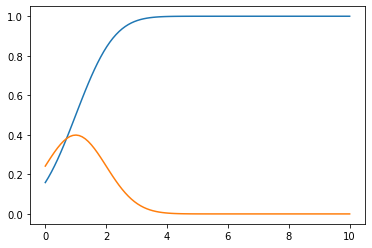

In [38]:
x = np.linspace(0,10,100)
Px=[]
for i in x:
    Px.append(P(i)[0])

Px = np.array(Px)

plt.plot(x,Px)
plt.plot(x,rho(x))

Px[x<0.1]